<a href="https://colab.research.google.com/github/gamzef/INF003/blob/master/proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install and Import Dependencies**

In [ ]:
!pip install kaggle #for kaggle datasets

In [ ]:
!pip install numpy #math operations
!pip install catboost #machine learning 

     |████████████████████████████████| 64.8MB 64kB/s 


In [ ]:
import pandas as pd #data preprocessing
import numpy as np
from catboost import CatBoostRegressor, Pool #machine learning
from sklearn.preprocessing import StandardScaler #data scaling(ölçekleme)
from sklearn.model_selection import GridSearchCV #hyperparameter optimization
from sklearn.svm import NuSVR, SVR  #support vector machine model
from sklearn.kernel_ridge import KernelRidge   #improve svm predictions
import matplotlib.pyplot as plt  #data visualiziaton

**Import Dataset from Kaggle**

In [ ]:
from google.colab import files  #Colab's file access feature
uploaded = files.upload()   #retrieve uploaded file
#upload Kaggle JSON File 
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/kaggle/kaggle.json 

Saving kaggle.json to kaggle.json
chmod: cannot access '/root/kaggle/kaggle.json': No such file or directory


In [ ]:
#download earthquake data
!kaggle competitions download -c LANL-Earthquake-Prediction

  0% 0.00/324k [00:00<?, ?B/s]
100% 324k/324k [00:00<00:00, 48.5MB/s]
  0% 0.00/319k [00:00<?, ?B/s]
100% 319k/319k [00:00<00:00, 106MB/s]
  0% 0.00/329k [00:00<?, ?B/s]
100% 329k/329k [00:00<00:00, 107MB/s]
  0% 0.00/332k [00:00<?, ?B/s]
100% 332k/332k [00:00<00:00, 45.8MB/s]
  0% 0.00/315k [00:00<?, ?B/s]
100% 315k/315k [00:00<00:00, 103MB/s]
  0% 0.00/319k [00:00<?, ?B/s]
100% 319k/319k [00:00<00:00, 44.4MB/s]
  0% 0.00/325k [00:00<?, ?B/s]
100% 325k/325k [00:00<00:00, 45.3MB/s]
  0% 0.00/329k [00:00<?, ?B/s]
100% 329k/329k [00:00<00:00, 108MB/s]
  0% 0.00/310k [00:00<?, ?B/s]
100% 310k/310k [00:00<00:00, 43.9MB/s]
  0% 0.00/330k [00:00<?, ?B/s]
100% 330k/330k [00:00<00:00, 106MB/s]
  0% 0.00/325k [00:00<?, ?B/s]
100% 325k/325k [00:00<00:00, 105MB/s]
  0% 0.00/321k [00:00<?, ?B/s]
100% 321k/321k [00:00<00:00, 104MB/s]
  0% 0.00/360k [00:00<?, ?B/s]
100% 360k/360k [00:00<00:00, 112MB/s]
  0% 0.00/336k [00:00<?, ?B/s]
100% 336k/336k [00:00<00:00, 46.6MB/s]
  0% 0.00/321k [00:00<?, ?B/

In [ ]:
#unzip training data for usage
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               train.csv



**Data Analysis**

In [ ]:
#train.csv'deki datayı okur, 6milyon data points, ilk data tipi acoustic_data, integer, ikincisi time to failure float. 
train = pd.read_csv('train.csv', nrows=6000000, dtype = {'acoustic_data': np.int16, 'time_to_failure': np.float64})

In [ ]:
#dataset'teki ilk 5 örnek
train.head(10)
#hepsini 1.4691 gösteriyordu. Alttaki koddan sonra hepsinin farklı olduğunu görüyoruz.
pd.options.display.precision = 15
train.head()

,acoustic_data,time_to_failure
0,12,1.4690999832
1,6,1.4690999821
2,8,1.4690999810
3,5,1.4690999799
4,8,1.4690999788


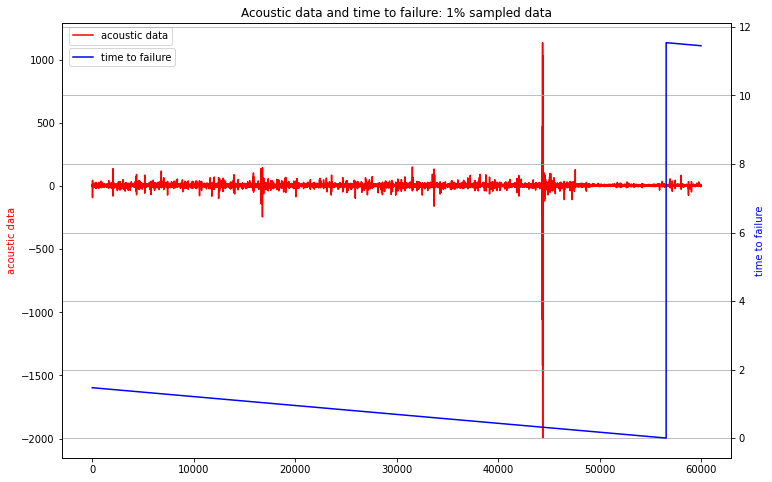

In [ ]:
#visualize of 1% of dataset, first 100 datapoints
train_ad_sample_df = train['acoustic_data'].values[::100]
train_ttf_sample_df = train['time_to_failure'].values[::100]

def plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df, title = "Acoustic data and time to failure: 1% sampled data"):
    fig, ax1 = plt.subplots(figsize=(12, 8))
    plt.title(title)
    plt.plot(train_ad_sample_df, color='r')
    ax1.set_ylabel('acoustic data', color='r')
    plt.legend(['acoustic data'], loc=(0.01, 0.95))
    ax2 = ax1.twinx()
    plt.plot(train_ttf_sample_df, color='b')
    ax2.set_ylabel('time to failure', color='b')
    plt.legend(['time to failure'], loc=(0.01, 0.9))
    plt.grid(True)

plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df)
del train_ad_sample_df
del train_ttf_sample_df

#There is a point before the actual earthquake 
#where there's a spike in acoustic activity seismographic activity.

Visualize all of the data

![image](https://drive.google.com/uc?export=view&id=1eEbV1lEoEm0rR3qoUvNYYK5_bzj-vK66)


In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR
from sklearn.metrics import mean_absolute_error

In [ ]:
train = pd.read_csv('train.csv',nrows=600000000, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})

In [ ]:
#dataset'teki ilk 5 örnek
pd.options.display.precision = 15
train.head()

,acoustic_data,time_to_failure
0,12,1.4690999832
1,6,1.4690999821
2,8,1.4690999810
3,5,1.4690999799
4,8,1.4690999788


In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR
from sklearn.metrics import mean_absolute_error

In [ ]:
# Create a training file with simple derived features

rows = 150_000
segments = int(np.floor(train.shape[0] / rows))   #6 milyon / 150bin
#SVM'nin tahminlerde bulunması için segmentlere böleriz
X_train = pd.DataFrame(index=range(segments), dtype=np.float64,
                       columns=['ave', 'std', 'max', 'min'])
y_train = pd.DataFrame(index=range(segments), dtype=np.float64,
                       columns=['time_to_failure'])

for segment in tqdm(range(segments)):
    seg = train.iloc[segment*rows:segment*rows+rows]
    x = seg['acoustic_data'].values
    y = seg['time_to_failure'].values[-1]
    
    y_train.loc[segment, 'time_to_failure'] = y
    
    X_train.loc[segment, 'ave'] = x.mean()
    X_train.loc[segment, 'std'] = x.std()   #standart sapma
    X_train.loc[segment, 'max'] = x.max()
    X_train.loc[segment, 'min'] = x.min()

100%|██████████| 4000/4000 [00:09<00:00, 414.15it/s]


In [ ]:
X_train.head()

,ave,std,max,min
0,4.884113333333334,5.101089126891323,104.0,-98.0
1,4.725766666666667,6.588801819164257,181.0,-154.0
2,4.906393333333333,6.967373808828945,140.0,-106.0
3,4.902240000000000,6.922282112791032,197.0,-199.0
4,4.908720000000000,7.301085852684289,145.0,-126.0


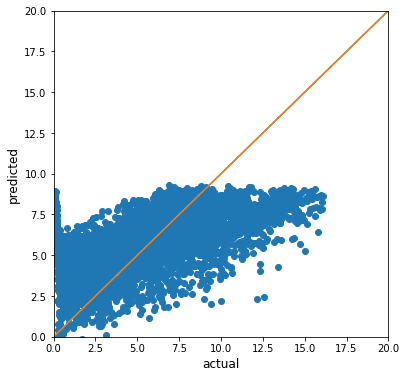

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

svm = NuSVR()
svm.fit(X_train_scaled, y_train.values.flatten())
y_pred = svm.predict(X_train_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(y_train.values.flatten(), y_pred)
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.xlabel('actual', fontsize=12)
plt.ylabel('predicted', fontsize=12)
plt.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)])
plt.show()

#https://www.kaggle.com/inversion/basic-feature-benchmark

In [ ]:
#Mean Absolute Error as Loss Function
score = mean_absolute_error(y_train.values.flatten(), y_pred)
print(f'Score: {score:0.3f}')
#Bu değer 0'a ne kadar yakınsa gerçek değerlere o kadar yaklaştığımızı anlarız.

Score: 2.321


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
submission = pd.read_csv('../content/drive/My Drive/input/sample_submission.csv', index_col='seg_id')

In [ ]:
X_test = pd.DataFrame(columns=X_train.columns, dtype=np.float64, index=submission.index)

In [ ]:
for seg_id in X_test.index:
    seg = pd.read_csv('../content/drive/My Drive/input/test/' + seg_id + '.csv')
    
    x = seg['acoustic_data'].values
    
    X_test.loc[seg_id, 'ave'] = x.mean()
    X_test.loc[seg_id, 'std'] = x.std()
    X_test.loc[seg_id, 'max'] = x.max()
    X_test.loc[seg_id, 'min'] = x.min()

In [ ]:
X_test_scaled = scaler.transform(X_test)
submission['time_to_failure'] = svm.predict(X_test_scaled)
submission.to_csv('submission.csv')
submission.head()

,time_to_failure
seg_id,
seg_00030f,6.421775209945157
seg_0012b5,6.072255955029233
seg_00184e,4.764736718860900
seg_003339,7.641821207732189
seg_0042cc,6.506883786266625
